# Optimization

In this notebook, we demonstrate the discussion in section TODO.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# For reproducibility
tf.random.set_seed(42)
# tf.config.experimental.enable_op_determinism()

## Data and Model for Demostration

Load and process MNIST dataset.

In [2]:
# Preprocess MNIST
mnist = tf.keras.datasets.mnist
# mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype('float32')
x_train = x_train.reshape([-1, 28, 28, 1])  # add channel.
x_train = x_train / 255.0
# x_train = (x_train - x_train.mean(axis=0, keepdims=True)) / (x_train.std(axis=0, keepdims=True) + 1e-3)
y_train = y_train.astype('int32')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


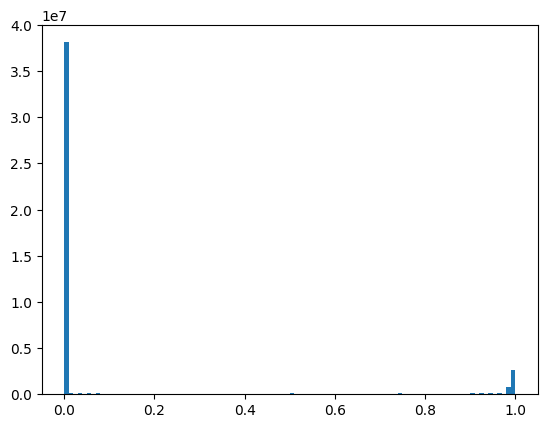

In [3]:
plt.hist(x_train.reshape([-1]), bins=100)
plt.show()

In [4]:
def build_model(model_type):
    if model_type == 0:
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 'relu'),
            tf.keras.layers.Dense(32, 'relu'),
            tf.keras.layers.Dense(10),
        ])
    elif model_type == 1:
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, 'relu'),
            tf.keras.layers.Dense(64, 'relu'),
            tf.keras.layers.Dense(64, 'relu'),
            tf.keras.layers.Dense(64, 'relu'),
            tf.keras.layers.Dense(10),
        ])
    elif model_type == 2:
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, 'relu'),
            tf.keras.layers.Dense(128, 'relu'),
            tf.keras.layers.Dense(32, 'relu'),
            tf.keras.layers.Dense(128, 'relu'),
            tf.keras.layers.Dense(10),
        ])
    else:
        raise ValueError()

    # Build the model
    x_batch = tf.random.uniform([128, 28, 28, 1])
    _ = model(x_batch)

    return model


def clone_model(model):
    new_model = tf.keras.models.clone_model(model)
    for i, var in enumerate(model.variables):
        new_model.variables[i].assign(var)
    return new_model


def get_num_params(model):
    num_params = 0
    for v in init_model.variables:
        num_params += tf.reduce_prod(tf.shape(v)).numpy()
    return num_params


init_model = build_model(2)
print(f'Number of parameters = {get_num_params(init_model)}')

Number of parameters = 38986


In [5]:
model = clone_model(init_model)
model.compile(
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adamw',
    metrics=['accuracy'],
)

In [6]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8319 - loss: 0.5476
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9521 - loss: 0.1592
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9633 - loss: 0.1183
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9689 - loss: 0.0979
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9739 - loss: 0.0835
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0641
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9814 - loss: 0.0582
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9841 - loss: 0.0516
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0482


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (128, 784)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (128, 32)                   │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (128, 128)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (128, 32)                   │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (128, 128)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (128, 10)                   │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,960 (456.88 KB)

 Trainable params: 38,986 (152.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,974 (304.59 KB)

In [25]:
def get_jacobian(fn, x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = model.layers[l](x)
    J = tape.jacobian(y, x)  # [B, Nin, B, Nout]
    J = tf.transpose(J, perm=[1, 3, 0, 2])  # [Nin, Nout, B, B]
    J = tf.linalg.diag_part(J)  # [Nin, Nout, B]
    J = tf.transpose(J, perm=[2, 0, 1])  # [B, Nin, Nout]
    return J


def get_random_vjp(J):
    v = tf.random.uniform(shape=J.shape, minval=-1, maxval=1)  # [B, Nout, Nin]
    v = v[:, :, 0]  # [B, Nout]
    vJ = tf.einsum('ab,abc->ac', v, J)  # [B, Nin]
    return v, vJ


def get_random_jvp(J):
    v = tf.random.uniform(shape=J.shape, minval=-1, maxval=1)  # [B, Nout, Nin]
    v = v[:, 0, :]  # [B, Nin]
    Jv = tf.einsum('abc,ac->ab', J, v)  # [B, Nout]
    return v, Jv

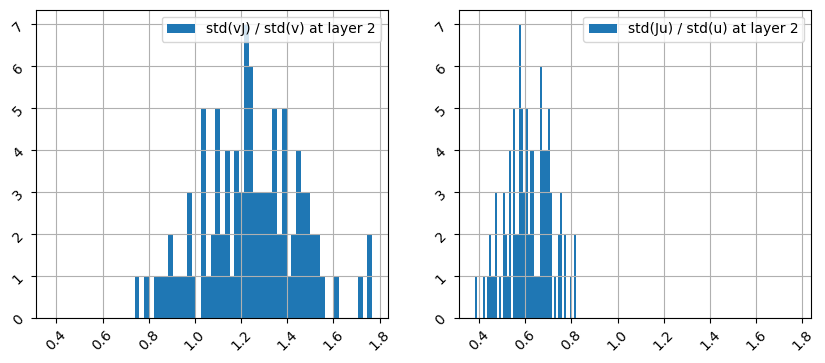

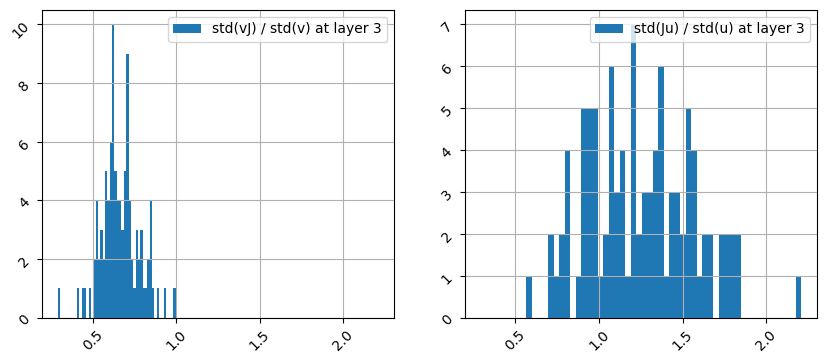

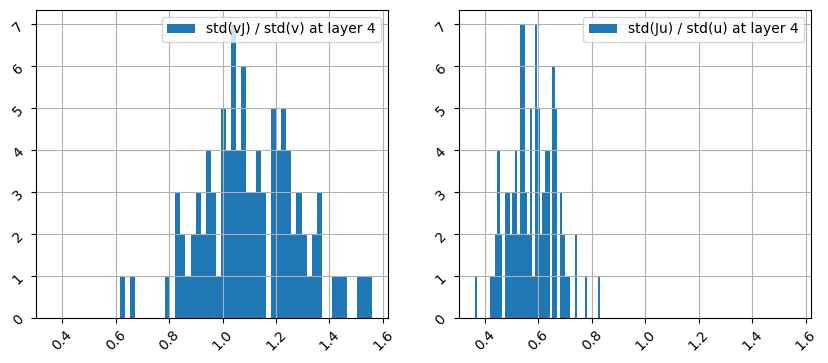

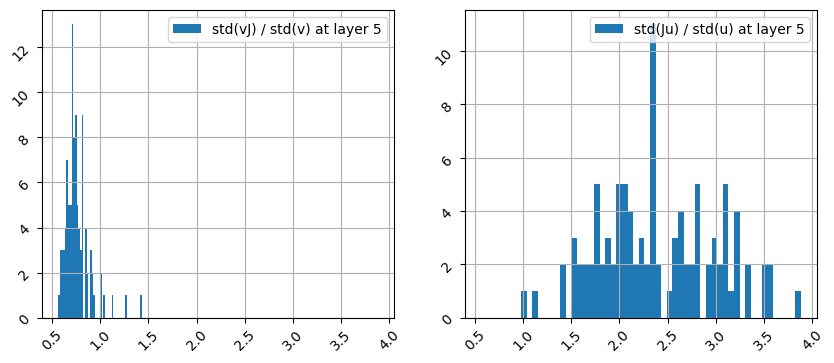

In [40]:
num_layers = len(model.layers)
for l in range(2, num_layers):
    fig, axs = plt.subplots(1, 2, figsize=(5*2, 4), sharex=True)
    x = tf.keras.Sequential(model.layers[:l])(x_train[:100])
    J = get_jacobian(model.layers[l], x)
    v, vJ = get_random_vjp(J)
    u, Ju = get_random_jvp(J)

    # Plot histograms
    axs[0].hist(
        vJ.numpy().std(axis=1) / v.numpy().std(axis=1),
        bins=50, label=f'std(vJ) / std(v) at layer {l}'
    )
    axs[0].legend(loc='upper right')
    axs[0].grid()
    axs[0].tick_params(labelrotation=45)

    axs[1].hist(
        Ju.numpy().std(axis=1) / u.numpy().std(axis=1),
        bins=50, label=f'std(Ju) / std(u) at layer {l}'
    )
    axs[1].legend(loc='upper right')
    axs[1].grid()
    axs[1].tick_params(labelrotation=45)

    # fig.suptitle('vJ vs Ju histogram on samples')
    plt.show()

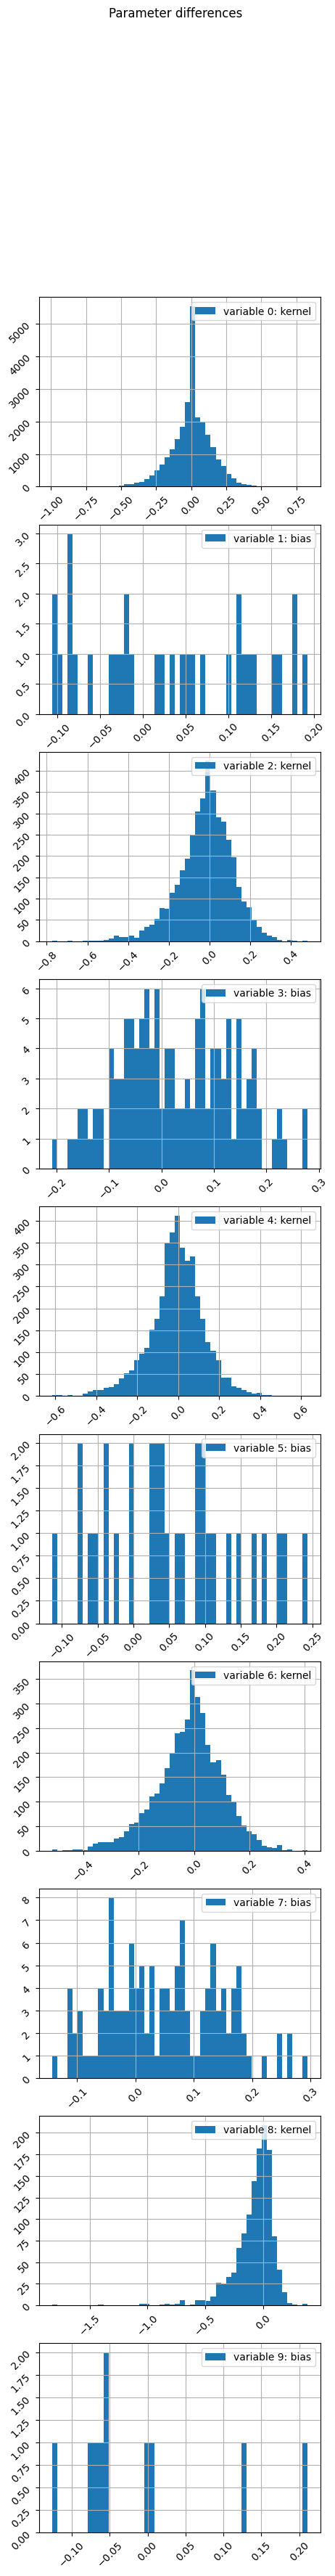

In [21]:
# Plot histograms
num_variables = len(init_model.variables)
fig, axs = plt.subplots(num_variables, 1, figsize=(5, 4*num_variables))
for i in range(num_variables):
    diff_var = model.variables[i] - init_model.variables[i]

    axs[i].hist(diff_var.numpy().reshape([-1]),
                   bins=50, label=f'variable {i}: {model.variables[i].name}')
    axs[i].legend(loc='upper right')
    axs[i].grid()
    axs[i].tick_params(labelrotation=45)

fig.suptitle('Parameter differences')
plt.show()

In [33]:
# K = tf.reduce_mean(J[:, :, tf.newaxis, :] * J[:, tf.newaxis, :, :], axis=3)
# K_eigvals = tf.math.real(tf.linalg.eigvals(K))
# K.shape

In [34]:
# plt.hist(tf.sqrt(tf.reduce_sum(K_eigvals, axis=1)).numpy(), bins=50)
# plt.title('Eigen(K)')
# plt.grid()
# plt.show()

In [35]:
zi = x_train[:100]
for layer in model.layers:
    zi = layer(zi)
    print(zi.numpy().mean(), zi.numpy().std())

0.12659499 0.30322394
1.1142864 1.6412487
0.49071655 0.91327244
1.1593362 2.0223496
0.699617 1.30768
-5.735627 8.28551


In [36]:
# L = tf.reduce_mean(J[:, :, tf.newaxis, :] * J[:, :, :, tf.newaxis], axis=1)
# L_eigvals = tf.math.real(tf.linalg.eigvals(L))
# print(L.shape)

In [37]:
# plt.hist(tf.sqrt(tf.reduce_sum(L_eigvals, axis=1)).numpy(), bins=50)
# plt.title('Eigen(L)')
# plt.grid()
# plt.show()

In [16]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
x = tf.keras.Sequential(model.layers[:l])(x_train[:100])
for i in range(len(model.layers)):
    x = tf.keras.Sequential(model.layers[:(i+1)])(x_train[:100])  # output of layer i.
    with tf.GradientTape() as tape:
        tape.watch(x)
        try:
            y = tf.keras.Sequential(model.layers[(i+1):])(x)
        except ValueError:  # x has been the model output.
            y = x
        loss_val = tf.reduce_sum(loss_fn(y_train[:100], y))
    g = tape.gradient(loss_val, x).numpy()
    print(g.shape, g.mean(), g.std())

(100, 784) -1.4921969e-06 0.00077863695
(100, 32) -2.4178142e-05 0.0010211957
(100, 128) 2.0638474e-06 0.00050584803
(100, 32) 6.0968596e-06 0.0005803394
(100, 128) -1.4091664e-06 0.00024062846
(100, 10) 2.0509106e-13 0.00037985356


Then define loss and training functions.

In [ ]:
# def cross_entropy_loss(logits, labels):
#     """Compute cross entropy loss with a sparse operation."""
#     sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(
#         logits=logits, labels=labels)
#     return tf.reduce_mean(sparse_ce)


# def train_step(model, optimizer, x_batch, y_batch):
#     with tf.GradientTape() as tape:
#         y_pred = model(x_batch)
#         loss_batch = cross_entropy_loss(y_pred, y_batch)
#     grads = tape.gradient(loss_batch, model.variables)
#     optimizer.apply_gradients(zip(grads, model.variables))
#     return loss_batch

Function for demostration.

In [ ]:
# def clone_model(model):
#     new_model = tf.keras.models.clone_model(model)
#     for i, var in enumerate(model.variables):
#         new_model.variables[i].assign(var)
#     return new_model


# def demostrate_optimizer(optimizer, epochs=5):
#     model = clone_model(init_model)
#     loss_values = []

#     # Training process.
#     for epoch in range(epochs):
#         ds_iter = ds_train.as_numpy_iterator()
#         while True:
#             try:
#                 x_batch, y_batch = next(ds_iter)
#             except StopIteration:
#                 break
#             loss_batch = train_step(model, optimizer, x_batch, y_batch)
#             loss_values.append(loss_batch.numpy())
#             if np.isnan(loss_values[-1]):
#                 raise ValueError('NaN')
#         print(f'epoch = {epoch}, loss = {np.mean(loss_values[-200:])}')

#     print(f'Final loss = {np.mean(loss_values[-200:])}')
#     plt.plot(loss_values)
#     plt.title('Training loss.')
#     plt.show()
#     return loss_values, model, optimizer

We use Adam optimizer as baseline.

In [ ]:
# _, optimized_model, _ = demostrate_optimizer(tf.keras.optimizers.Adam())

In [ ]:
# x_batch, y_batch = next(ds_train.as_numpy_iterator())
# print(x_batch.mean(), x_batch.std())
# for i in range(len(optimized_model.layers)):
#     yi = tf.keras.Sequential(optimized_model.layers[:(i+1)])(x_batch).numpy()
#     print(yi.mean(), yi.std())

In [ ]:
# # Compute initial gradients
# x_batch, y_batch = next(ds_train.as_numpy_iterator())
# with tf.GradientTape() as tape:
#     with tf.GradientTape() as tape:
#         y_pred = init_model(x_batch)
#         loss_batch = cross_entropy_loss(y_pred, y_batch)
#     init_gradients = tape.gradient(loss_batch, init_model.variables)

# # Plot histograms
# num_variables = len(init_model.variables)
# fig, axs = plt.subplots(num_variables, 3, figsize=(15, 4*num_variables))
# for i in range(num_variables):
#     diff_var = optimized_model.variables[i] - init_model.variables[i]
#     init_grad = init_gradients[i]

#     axs[i][0].hist(diff_var.numpy().reshape([-1]),
#                    bins=50, label=f'variable {i}')
#     axs[i][0].legend(loc='upper right')
#     axs[i][0].grid()
#     axs[i][0].tick_params(labelrotation=45)

#     axs[i][1].hist(init_grad.numpy().reshape([-1]),
#                    bins=50, label=f'gradient {i}')
#     axs[i][1].legend(loc='upper right')
#     axs[i][1].grid()
#     axs[i][1].tick_params(labelrotation=45)

#     axs[i][2].hist((tf.abs(init_grad) / (tf.abs(diff_var)+1e-4)).numpy().reshape([-1]),
#                    bins=50, label=f'estimated steps {i}')
#     axs[i][2].legend(loc='upper right')
#     axs[i][2].grid()
#     axs[i][2].tick_params(labelrotation=45)

# fig.suptitle('Parameter differences v.s. initial gradients v.s. estimated steps')
# plt.show()

In [ ]:
# def get_variable_shapes(model):
#     return [list(var.shape) for var in model.variables]

In [ ]:
# class RGprop:

#     def __init__(self, learning_rate=2e-4, decay_factor=0.95, epsilon=1e-8):
#         self.learning_rate = learning_rate
#         self.decay_factor = decay_factor
#         self.epsilon = epsilon

#     def build(self, variable_shapes):
#         self.moving_averages = []
#         for shape in variable_shapes:
#             avg_grad = tf.Variable(tf.zeros(shape))
#             self.moving_averages.append(avg_grad)
#         return self

#     def apply_gradients(self, grads_and_vars):
#         for i, (grad, var) in enumerate(grads_and_vars):
#             avg_grad = self.moving_averages[i]
#             avg_grad.assign(
#                 self.decay_factor * avg_grad + (1-self.decay_factor) * grad)
#             scale = tf.sqrt(tf.reduce_mean(tf.square(avg_grad)))
#             var.assign_sub(
#                 self.learning_rate * avg_grad / (scale + self.epsilon))

Then, implemented the optimizer shown as a simple instance in section TODO.

In [ ]:
# _ = demostrate_optimizer(RGprop().build(get_variable_shapes(init_model)))

In [ ]:
# class Signprop:

#     def __init__(self, learning_rate=2e-4, decay_factor=0.95):
#         self.learning_rate = learning_rate
#         self.decay_factor = decay_factor

#     def build(self, variable_shapes):
#         self.moving_averages = []
#         for shape in variable_shapes:
#             avg_grad = tf.Variable(tf.zeros(shape))
#             self.moving_averages.append(avg_grad)
#         return self

#     def apply_gradients(self, grads_and_vars):
#         for i, (grad, var) in enumerate(grads_and_vars):
#             avg_grad = self.moving_averages[i]
#             avg_grad.assign(
#                 self.decay_factor * avg_grad + (1-self.decay_factor) * grad)
#             var.assign_sub(
#                 self.learning_rate * tf.math.sign(avg_grad))

In [ ]:
# _ = demostrate_optimizer(Signprop().build(get_variable_shapes(init_model)))

In [ ]:
# class Signprop:

#     def __init__(self, learning_rate=5e-3, decay_factor=0.95):
#         self.learning_rate = learning_rate
#         self.decay_factor = decay_factor

#     def build(self, variable_shapes):
#         self.moving_averages = []
#         self.scales = []
#         for shape in variable_shapes:
#             avg_grad = tf.Variable(tf.zeros(shape))
#             self.moving_averages.append(avg_grad)
#             scale = 1/tf.sqrt(tf.reduce_sum(tf.convert_to_tensor(shape, tf.float32)))
#             self.scales.append(scale)
#         return self

#     def apply_gradients(self, grads_and_vars):
#         for i, (grad, var) in enumerate(grads_and_vars):
#             avg_grad = self.moving_averages[i]
#             avg_grad.assign(
#                 self.decay_factor * avg_grad + (1-self.decay_factor) * grad)
#             var.assign_sub(
#                 self.learning_rate * self.scales[i] * tf.math.sign(avg_grad))

In [ ]:
# _ = demostrate_optimizer(Signprop().build(get_variab?le_shapes(init_model)))

In [ ]:
# x_batch, y_batch = next(ds_train.as_numpy_iterator())

# def examine_model(model):
#     pre_models = []
#     post_models = []
#     for i in range(len(model.layers)):
#         pre_models.append(tf.keras.Sequential(model.layers[:(i+1)]))
#         post_models.append(tf.keras.Sequential(model.layers[i:]))

#     # print(x_batch.mean(), x_batch.std())
#     for i in range(len(model.layers)):
#         zi = pre_models[i](x_batch)
#         with tf.GradientTape() as tape:
#             tape.watch(zi)
#             try:
#                 y_pred = post_models[i+1](zi)
#             except IndexError:
#                 y_pred = zi
#             loss_value = cross_entropy_loss(y_pred, y_batch)
#         gi = tape.gradient(loss_value, zi).numpy()
#         print(f'{i} ##', zi.numpy().mean(), zi.numpy().std(), '##', gi.mean(), gi.std())
#         # plt.hist(gi.reshape([-1]), bins=500)
#         # plt.show()

In [ ]:
# model = clone_model(init_model)
# model.compile(
#     loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer='sgd',
#     metrics=['accuracy'],
# )

In [ ]:
# with tf.GradientTape() as tape:
#     y_pred = model(x_batch)
#     loss_value = cross_entropy_loss(y_pred, y_batch)
# for g in tape.gradient(loss_value, model.variables):
#     print(g.numpy().mean(), g.numpy().std())

In [ ]:
# print('* before training:')
# examine_model(model)
# for epoch in range(5):
#     model.fit(
#         x_train, y_train, batch_size=64,
#     )
#     print(f'* epoch = {epoch}:')
#     examine_model(model)

In [ ]:
# model.summary()

In [ ]:
# with tf.GradientTape() as tape:
#     y_pred = model(x_batch)
#     loss_value = cross_entropy_loss(y_pred, y_batch)
# for g in tape.gradient(loss_value, model.variables):
#     print(g.numpy().mean(), g.numpy().std())

In [ ]:
# model.variables

In [ ]:
# examine_model(model)

## Conclusion

We find that the optimizer shown as a simple instance in the section just a little slower than the Adam optimizer. But the RAM occupition is half comparing with the later.

In [ ]:
# loss_values_v2, optimized_model_v2, _ = demostrate_optimizer(Signprop().build(get_variable_shapes(init_model)))

In [ ]:
# np.mean(loss_values_v2[100:(100+100)])

In [ ]:
# # Compute initial gradients
# x_batch, y_batch = next(ds_train.as_numpy_iterator())
# with tf.GradientTape() as tape:
#     with tf.GradientTape() as tape:
#         y_pred = init_model(x_batch)
#         loss_batch = cross_entropy_loss(y_pred, y_batch)
#     init_gradients = tape.gradient(loss_batch, init_model.variables)

# # Plot histograms
# num_variables = len(init_model.variables)
# fig, axs = plt.subplots(num_variables, 3, figsize=(15, 4*num_variables))
# for i in range(num_variables):
#     diff_var = optimized_model_v2.variables[i] - init_model.variables[i]
#     init_grad = init_gradients[i]

#     axs[i][0].hist(diff_var.numpy().reshape([-1]),
#                    bins=50, label=f'variable {i}')
#     axs[i][0].legend(loc='upper right')
#     axs[i][0].grid()
#     axs[i][0].tick_params(labelrotation=45)

#     axs[i][1].hist(init_grad.numpy().reshape([-1]),
#                    bins=50, label=f'gradient {i}')
#     axs[i][1].legend(loc='upper right')
#     axs[i][1].grid()
#     axs[i][1].tick_params(labelrotation=45)

#     axs[i][2].hist((tf.abs(init_grad) / (tf.abs(diff_var)+1e-4)).numpy().reshape([-1]),
#                    bins=50, label=f'estimated steps {i}')
#     axs[i][2].legend(loc='upper right')
#     axs[i][2].grid()
#     axs[i][2].tick_params(labelrotation=45)

# fig.suptitle('Parameter differences v.s. initial gradients v.s. estimated steps')
# plt.show()